<a href="https://colab.research.google.com/github/cmorgan3324/Video-Instance-Segmentation/blob/main/Video_Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Video Instance Segmentation with YOLOv8: Training, Optimization, and Deployment**

## Connect with Google Drive

In [ ]:
# Mount Google Drive to access datasets and model files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install YOLOv8

* yolov8 github: https://github.com/ultralytics/ultralytics

* yolov8 docs: https://docs.ultralytics.com/quickstart/

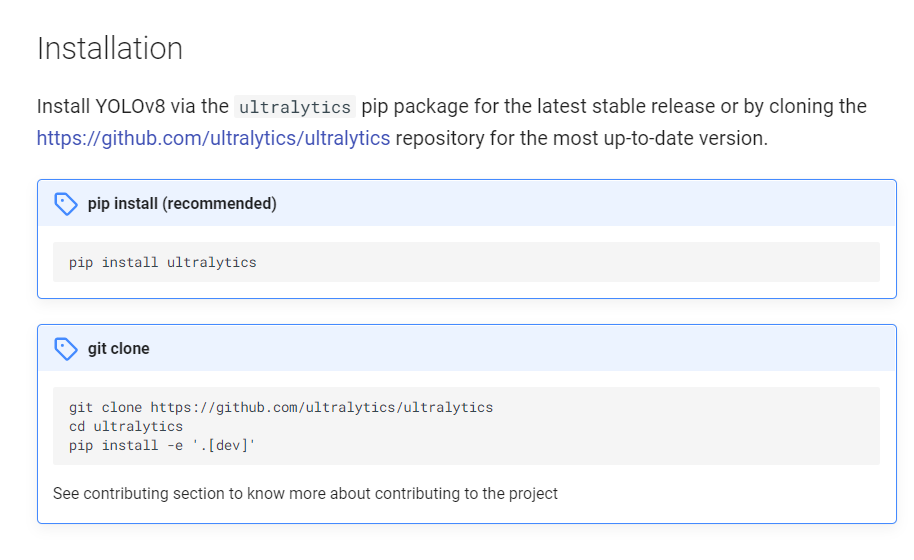


In [ ]:
# Install YOLOv8 and its dependencies
# Pip install

!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.4/911.4 kB 15.5 MB/s eta 0:00:00


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 15.6/225.3 GB disk)


## Training YOLO8

* **task=** detect or segment
* **mode=** train, val
* **model=** path to model file, i.e. yolov8n-seg.pt, yolov8l-seg.yaml
* **data=** path to data file dataset.yaml
* **epochs=** number of epochs to train for
* **imgsz=** size of input images as integer
* **batch=** number of images per batch
* **project=** project traing results saving path
* **name=** experiment name


The backslash at the end of a line indicates that the command continues on the next line; used for improved readability in Python.

In [ ]:
!yolo task=segment \
    mode=train \
    model=yolov8n-seg.pt \
    data=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/dataset.yaml \
    epochs=50 \
    imgsz=640 \
    batch=5 \
    project=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TrainingResults \
    name=Vehicle

Traceback (most recent call last):
  File "/usr/lib/python3.11/urllib/request.py", line 1352, in do_open
    r = h.getresponse()
        ^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line 1314, in recv_into
    return self.read(nbytes, buffer)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line 1166, in read
    return self._sslobj.read(len, buffer)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Keyboa

## Inference using trained YOLO8

**Instance Segmentation On the Test Images**

In [ ]:
!yolo task=segment \
    mode=predict \
    model=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TrainingResults/Vehicle4/weights/best.pt \
    conf=0.55 \
    source=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/Data/test/enhanced_test_images


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs

image 1/7 /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/Data/test/enhanced_test_images/enhanced_image_13_png.rf.c45bccb81a3cb2297a376b52d803c0ac.jpg: 640x640 4 motorbike-bikes, 149.3ms
image 2/7 /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/Data/test/enhanced_test_images/enhanced_image_24_png.rf.a7cb8c3436997493e456167814576d3b.jpg: 640x640 2 cars, 9 motorbike-bikes, 1 truck, 104.9ms
image 3/7 /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/Data/test/enhanced_test_images/enhanced_image_25_png.rf.b01f11f226a1648f82a5b7c4aa1999a3.jpg: 640x640 1 car, 3 motorbike-bikes, 60.0ms
image 4/7 /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/Data/test/enhanced_test_images/enhanced_image_28_png.rf.4f96a9029cccd47d9fc651d1818de9a1.jpg: 64

In [ ]:
# Move predict folder to google drive
!cp -r /content/runs/segment/predict /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/SegmentationResults/

**Instance Segmentation on Vidoes**

In [ ]:
!yolo task=segment \
    mode=predict \
    model=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TrainingResults/Vehicle4/weights/best.pt \
    conf=0.55 \
    source=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos


Streaming output truncated to the last 5000 lines.
video 1/2 (frame 229/716) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4: 384x640 (no detections), 95.0ms
video 1/2 (frame 230/716) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4: 384x640 (no detections), 43.6ms
video 1/2 (frame 231/716) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4: 384x640 (no detections), 90.8ms
video 1/2 (frame 232/716) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4: 384x640 (no detections), 92.9ms
video 1/2 (frame 233/716) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4: 384x640 (no detections), 93.4ms
video 1/2 (frame 234/716) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4: 384x640 (no detections), 93

Enhance test video

In [ ]:
# Test video enhancement

import cv2
import numpy as np
import os

# List of input video files (Update with your file names)
video_paths = ["/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4",
               "/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway Traffic.mp4"]

# Function to enhance video frames
def enhance_frame(frame):
    lab = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    enhanced_lab = cv2.merge((l, a, b))
    enhanced_frame = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
    return enhanced_frame

# Process each video
for video_path in video_paths:
    if not os.path.exists(video_path):
        print(f"File not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define output path
    output_video_path = video_path.replace(".mp4", "_enhanced.mp4")

    # Video writer setup
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    print(f"Processing {video_path}...")

    # Process frames
    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Enhance frame
        enhanced_frame = enhance_frame(frame)
        out.write(enhanced_frame)

        frame_idx += 1
        if frame_idx % 100 == 0:
            print(f"Processed {frame_idx} frames of {video_path}")

    # Release resources
    cap.release()
    out.release()

    print(f"Enhanced video saved as: {output_video_path}")

print("All videos processed successfully.")



Processing /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4...
Processed 100 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Processed 200 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Processed 300 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Processed 400 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Processed 500 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Processed 600 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Processed 700 frames of /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Cars On Road.mp4
Enhanced video sav

In [ ]:
# Run instance segmentation
!yolo task=segment \
    mode=predict \
    model=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TrainingResults/Vehicle4/weights/best.pt \
    conf=0.55 \
    source=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos

Streaming output truncated to the last 5000 lines.
video 3/4 (frame 4022/4509) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway Traffic.mp4: 384x640 5 cars, 96.8ms
video 3/4 (frame 4023/4509) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway Traffic.mp4: 384x640 5 cars, 95.9ms
video 3/4 (frame 4024/4509) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway Traffic.mp4: 384x640 6 cars, 1 motorbike-bike, 96.0ms
video 3/4 (frame 4025/4509) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway Traffic.mp4: 384x640 6 cars, 1 motorbike-bike, 94.5ms
video 3/4 (frame 4026/4509) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway Traffic.mp4: 384x640 5 cars, 1 motorbike-bike, 43.4ms
video 3/4 (frame 4027/4509) /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TestVideos/Highway T

In [ ]:
!cp -r /content/runs/segment/predict2 /content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/SegmentationResults/

##Deploy YOLO8
**Export the trained YOLO8 Model**






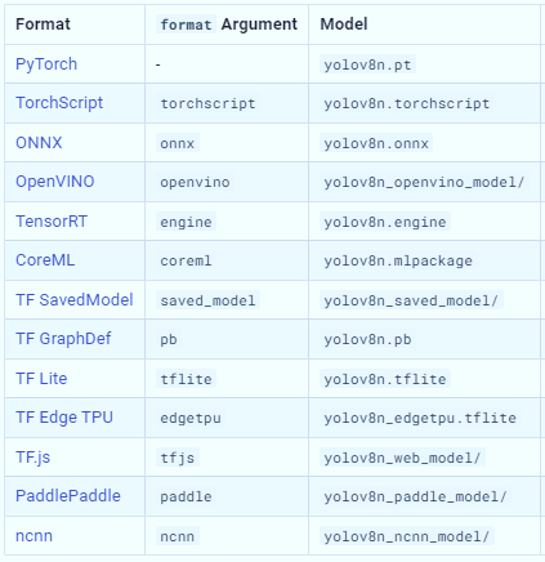

In [ ]:
# Export the trained model to ONNX format for optimized inference
!yolo mode=export \
    model=/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TrainingResults/Vehicle4/weights/best.pt \
    format=onnx

Ultralytics 8.3.66 🚀 Python-3.11.11 torch-2.5.1+cpu CPU (Intel Xeon 2.00GHz)
YOLOv8n-seg summary (fused): 195 layers, 3,259,234 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/InstanceSegmentation/VehicleInstanceSegmentation/TrainingResults/Vehicle4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 42, 8400), (1, 32, 160, 160)) (6.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 203.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 309.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 189.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 253.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 238.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.2s, installed 3 packages: ['onnx>=